<a href="https://colab.research.google.com/github/priyanshrupani/Customer-segmentation/blob/main/Customer_segmentation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [43]:
df= pd.read_csv('/Mall_Customers.csv')

In [44]:
# seeing the raw data
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [45]:
# checking for any null value
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [46]:
# visualizing the data
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [47]:
#selecting the important for clustering
s= df.iloc[:,[4,3]]
s

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17
...,...,...
195,79,120
196,28,126
197,74,126
198,18,137


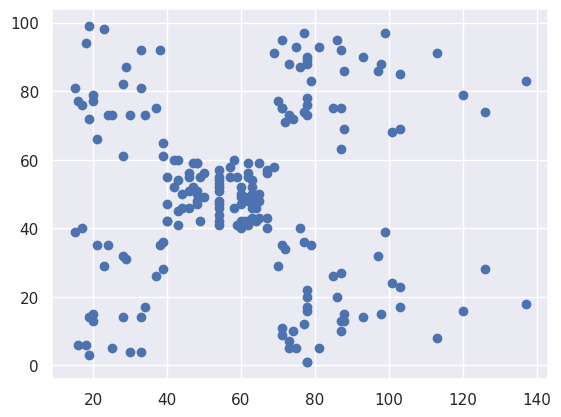

In [48]:
# The scatterplot to see the data
plt.scatter(s['Annual Income (k$)'],s['Spending Score (1-100)'])
plt.show()

In [49]:
X=s.values
X

array([[ 39,  15],
       [ 81,  15],
       [  6,  16],
       [ 77,  16],
       [ 40,  17],
       [ 76,  17],
       [  6,  18],
       [ 94,  18],
       [  3,  19],
       [ 72,  19],
       [ 14,  19],
       [ 99,  19],
       [ 15,  20],
       [ 77,  20],
       [ 13,  20],
       [ 79,  20],
       [ 35,  21],
       [ 66,  21],
       [ 29,  23],
       [ 98,  23],
       [ 35,  24],
       [ 73,  24],
       [  5,  25],
       [ 73,  25],
       [ 14,  28],
       [ 82,  28],
       [ 32,  28],
       [ 61,  28],
       [ 31,  29],
       [ 87,  29],
       [  4,  30],
       [ 73,  30],
       [  4,  33],
       [ 92,  33],
       [ 14,  33],
       [ 81,  33],
       [ 17,  34],
       [ 73,  34],
       [ 26,  37],
       [ 75,  37],
       [ 35,  38],
       [ 92,  38],
       [ 36,  39],
       [ 61,  39],
       [ 28,  39],
       [ 65,  39],
       [ 55,  40],
       [ 47,  40],
       [ 42,  40],
       [ 42,  40],
       [ 52,  42],
       [ 60,  42],
       [ 54,

In [50]:
# using the elbow method to find the number of optimial cluster
arr=[]

for i in range(1,20):
  s=KMeans(n_clusters= i,init='k-means++',random_state=42)

  s.fit(X)

  arr.append(s.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

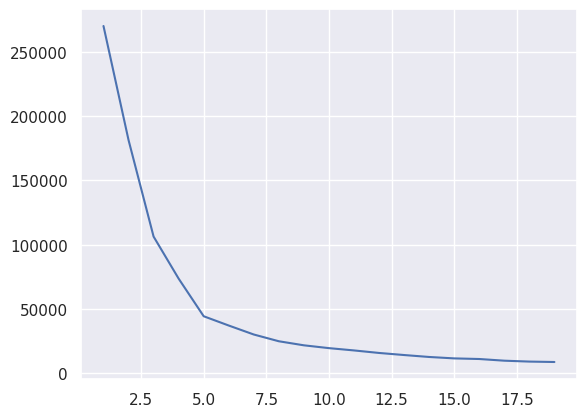

In [51]:

plt.plot(range(1,20),arr)
plt.show()

In [52]:
final=KMeans(n_clusters=5,init='k-means++',random_state=0)
final.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [53]:
# final cluster
P=final.fit_predict(X)
P

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [54]:
df['Cluster_value'] = P
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_value
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [55]:
# visulazing the cluster
df1=df[df.Cluster_value==0]
df2=df[df.Cluster_value==1]
df5=df[df.Cluster_value==2]
df3=df[df.Cluster_value==3]
df4=df[df.Cluster_value==4]

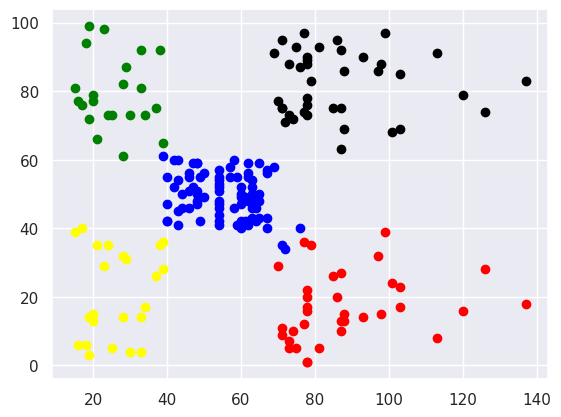

In [56]:
#plot the data in colour which groups the cluster
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],c='red')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],c='blue')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],c='green')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],c='yellow')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],c='black')
plt.show()